# Decision Trees and Random Forests in Python

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

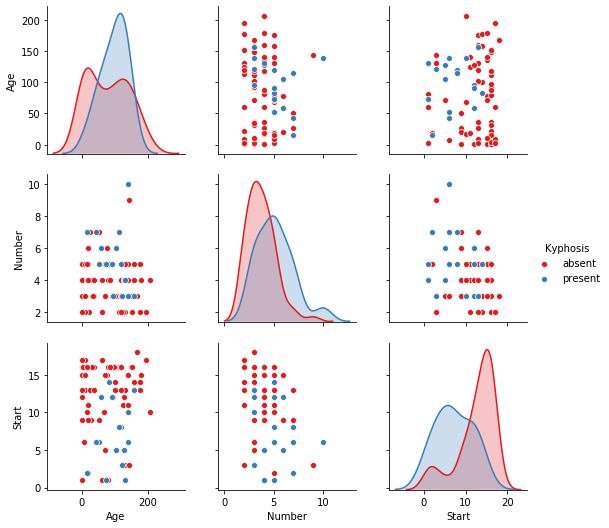

In [5]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [17]:
y_train.value_counts()

absent     47
present     9
Name: Kyphosis, dtype: int64

## Decision Trees

We'll start just by training a single decision tree.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [18]:
predictions = dtree.predict(X_test)

In [21]:
predProb = dtree.predict_proba(X_test)

In [22]:
predProb

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 2  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library (and graphviz), but here is an example of what it looks like and the code to execute this:

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


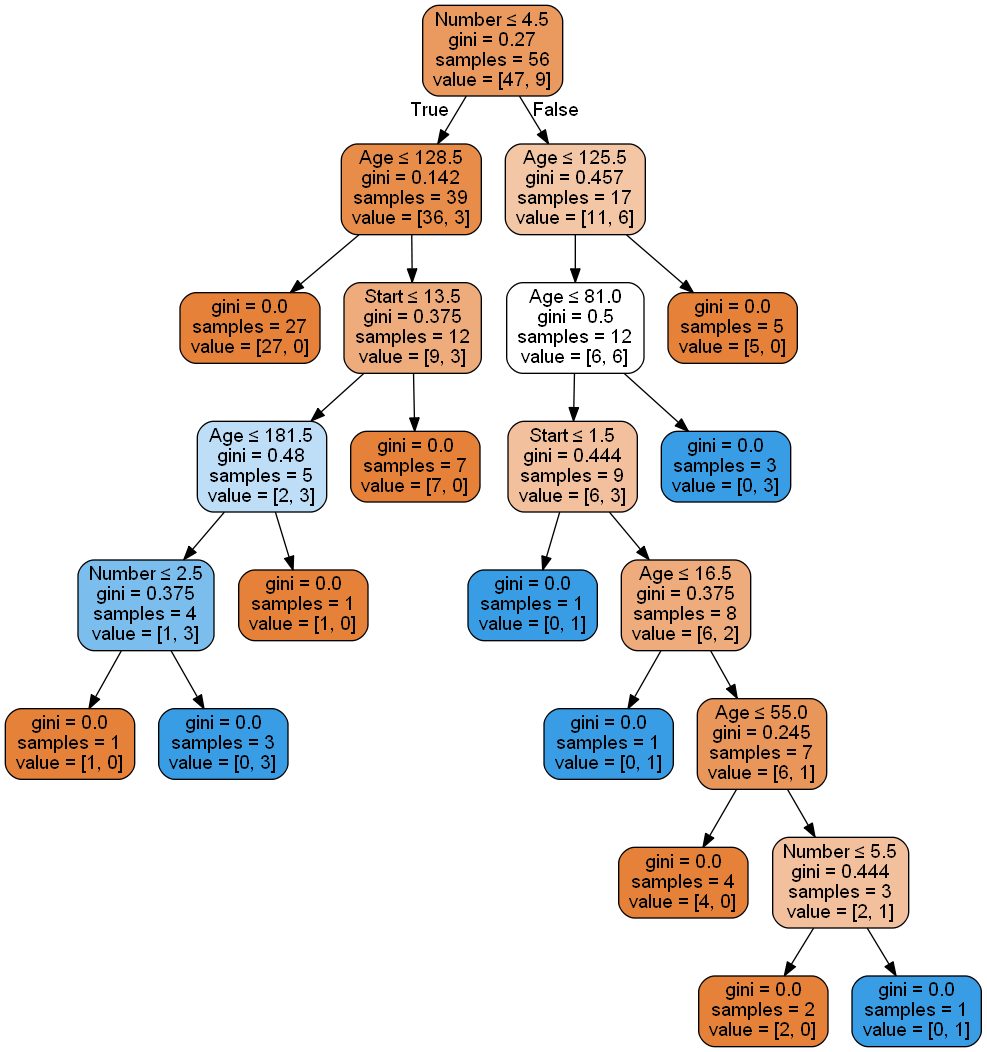

In [24]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True, feature_names = X_train.columns,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forests

Now let's compare the decision tree model to a random forest.

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, class_weight={'absent':1, 'present':5}, min_samples_split=20)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={'absent': 1, 'present': 5},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

Random Forest, as its name stated is analyze by random sub-sample from the dataset (by bootstrap sample or not) to create a lot of decision tree and creating an ensemble method. 

There are 2 level of randomness in the Random Forest; Row level and Column level. In each decision tree, the sub-sample is first take around 1/1-e (close to 0.63) * n number of row (if bootstrap then the same row could be selected again). After that at each node, the columns is randomly selected as many as sqrt(number of columns).

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
rfc_predProb = rfc.predict_proba(X_test)

In [39]:
rfc_predProb

array([[0.830191  , 0.169809  ],
       [0.31205747, 0.68794253],
       [0.32518587, 0.67481413],
       [0.4194501 , 0.5805499 ],
       [0.93333829, 0.06666171],
       [0.68570913, 0.31429087],
       [0.32692506, 0.67307494],
       [0.54176428, 0.45823572],
       [0.56916681, 0.43083319],
       [0.69340908, 0.30659092],
       [0.90654809, 0.09345191],
       [0.51221501, 0.48778499],
       [0.61490625, 0.38509375],
       [0.58498568, 0.41501432],
       [0.70547186, 0.29452814],
       [0.87548999, 0.12451001],
       [0.94107638, 0.05892362],
       [0.79833729, 0.20166271],
       [0.53554372, 0.46445628],
       [0.75400453, 0.24599547],
       [0.6461443 , 0.3538557 ],
       [0.39315841, 0.60684159],
       [0.41036231, 0.58963769],
       [0.42007945, 0.57992055],
       [0.41597097, 0.58402903]])

In [27]:
print(confusion_matrix(y_test,rfc_pred))

[[14  3]
 [ 1  7]]


In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.93      0.82      0.87        17
     present       0.70      0.88      0.78         8

    accuracy                           0.84        25
   macro avg       0.82      0.85      0.83        25
weighted avg       0.86      0.84      0.84        25



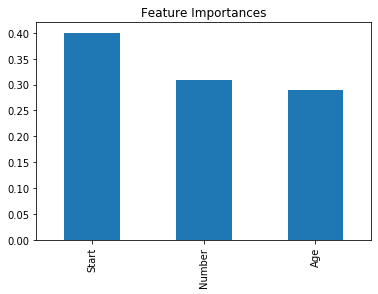

In [40]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False)
coef1.plot(kind = 'bar', title ='Feature Importances')

## GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
rfc = RandomForestClassifier()

In [51]:
search = GridSearchCV(estimator = rfc,
                      refit = 'accuracy',
                     param_grid = {
                         'n_estimators': [100, 200, 300, 500],
                         'bootstrap': [True, False],
                         'min_samples_split' : [2, 5, 10, 20]
                     },scoring = 'accuracy',
                     cv = 5,
                     n_jobs = -1)


In [52]:
search.fit(X_train, y_train)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [26]:
search.best_params_

{'bootstrap': True, 'min_samples_split': 5, 'n_estimators': 300}

In [27]:
search.best_score_

0.8035714285714286